# 1. Data Cleaning: Handling Missing Values, Outliers

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load dataset
dataset = pd.read_csv('dataset_med.csv')

In [3]:
dataset

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [4]:
# how many rows and columns
dataset.shape

(890000, 17)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [6]:
dataset.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [7]:
dataset.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [8]:
def univariate(dataset):
    Qual=[]
    Quan=[]
    for columnName in dataset:
        #print(columnName)
        if(dataset[columnName].dtypes =='O'):
            #print('Qual')
            Qual.append(columnName)
        else:
            #print('Quan')
            Quan.append(columnName)
    return Qual,Quan

In [9]:
Qual,Quan = univariate(dataset)

In [10]:
Qual

['gender',
 'country',
 'diagnosis_date',
 'cancer_stage',
 'family_history',
 'smoking_status',
 'treatment_type',
 'end_treatment_date']

In [11]:
Quan

['id',
 'age',
 'bmi',
 'cholesterol_level',
 'hypertension',
 'asthma',
 'cirrhosis',
 'other_cancer',
 'survived']

In [12]:
dataset.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Step 1: Select specific columns for outlier detection
Quan_S = [
    'age',
    'bmi',
    'cholesterol_level'
]


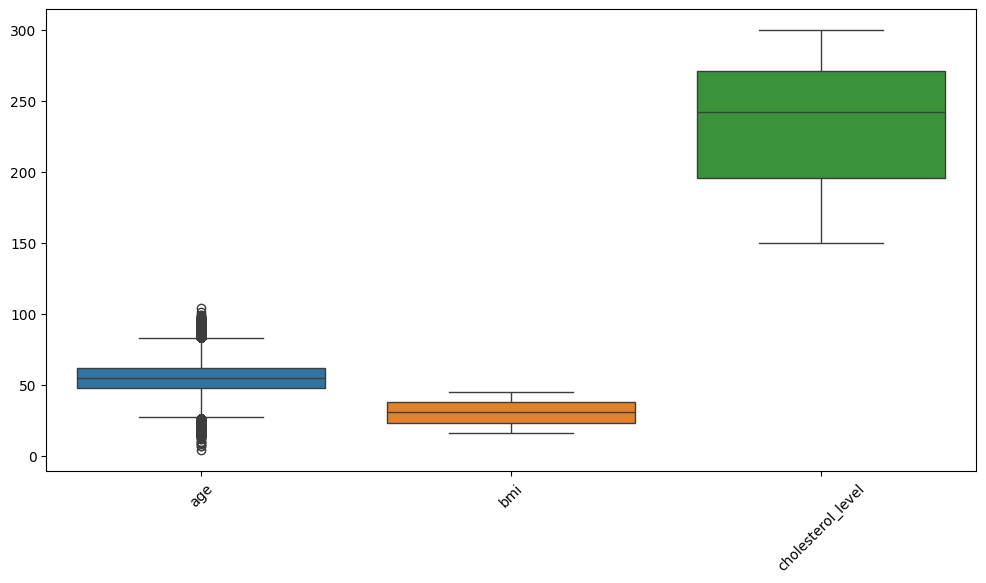

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=dataset[Quan_S])
plt.xticks(rotation=45)
plt.show()


In [15]:
def central_tendency_IQR(dataset, Quan_S):

    descriptive = pd.DataFrame(
        index=[
            'Mean', 'Median', 'Mode',
            'Q1:25%', 'Q2:50%', 'Q3:75%', 'Q4:100%',
            'IQR', 'Lesser IQR', 'Greater IQR',
            'min', 'max', 'kurtosis', 'skew', 'var', 'std'
        ],
        columns=Quan_S
    )

    for columnName in Quan_S:
        descriptive.loc['Mean', columnName] = dataset[columnName].mean()
        descriptive.loc['Median', columnName] = dataset[columnName].median()
        descriptive.loc['Mode', columnName] = dataset[columnName].mode()[0]

        Q1 = dataset[columnName].quantile(0.25)
        Q2 = dataset[columnName].quantile(0.50)
        Q3 = dataset[columnName].quantile(0.75)
        IQR = Q3 - Q1

        descriptive.loc['Q1:25%', columnName] = Q1
        descriptive.loc['Q2:50%', columnName] = Q2
        descriptive.loc['Q3:75%', columnName] = Q3
        descriptive.loc['Q4:100%', columnName] = dataset[columnName].max()

        descriptive.loc['IQR', columnName] = IQR
        descriptive.loc['Lesser IQR', columnName] = Q1 - 1.5 * IQR
        descriptive.loc['Greater IQR', columnName] = Q3 + 1.5 * IQR

        descriptive.loc['min', columnName] = dataset[columnName].min()
        descriptive.loc['max', columnName] = dataset[columnName].max()
        descriptive.loc['kurtosis', columnName] = dataset[columnName].kurtosis()
        descriptive.loc['skew', columnName] = dataset[columnName].skew()
        descriptive.loc['var', columnName] = dataset[columnName].var()
        descriptive.loc['std', columnName] = dataset[columnName].std()

    return descriptive


In [16]:
descriptive = central_tendency_IQR(dataset, Quan_S)

In [17]:
descriptive

,age,bmi,cholesterol_level
Mean,55.007008,30.494172,233.633916
Median,55.0,30.5,242.0
Mode,55.0,32.0,253
Q1:25%,48.0,23.3,196.0
Q2:50%,55.0,30.5,242.0
Q3:75%,62.0,37.7,271.0
Q4:100%,104.0,45.0,300
IQR,14.0,14.4,75.0
Lesser IQR,27.0,1.7,83.5
Greater IQR,83.0,59.3,383.5


In [18]:
def check_outliers(dataset, descriptive, Quan_S):

    lesser = []
    greater = []

    for columnName in Quan_S:
        # Lower bound check
        if descriptive.loc['Lesser IQR', columnName] > descriptive.loc['min', columnName]:
            lesser.append(columnName)

        # Upper bound check
        if descriptive.loc['Greater IQR', columnName] < descriptive.loc['max', columnName]:
            greater.append(columnName)

    return lesser, greater


In [19]:
descriptive = central_tendency_IQR(dataset, Quan_S)

lesser, greater = check_outliers(dataset, descriptive, Quan_S)

print("Lower bound outliers:", lesser)
print("Upper bound outliers:", greater)


Lower bound outliers: ['age']
Upper bound outliers: ['age']


In [20]:
check_outliers(dataset, descriptive, Quan_S)

(['age'], ['age'])

In [21]:
lesser,greater = check_outliers(dataset,descriptive, Quan_S)

In [22]:
lesser

['age']

In [23]:
greater

['age']

In [24]:
def replace_outliers_IQR(dataset, descriptive, Quan_S):

    dataset_out = dataset.copy()

    for columnName in Quan_S:
        lower_bound = descriptive.loc['Lesser IQR', columnName]
        upper_bound = descriptive.loc['Greater IQR', columnName]

        dataset_out[columnName] = np.where(
            dataset_out[columnName] < lower_bound,
            lower_bound,
            np.where(
                dataset_out[columnName] > upper_bound,
                upper_bound,
                dataset_out[columnName]
            )
        )

    return dataset_out


In [25]:
dataset_capped = replace_outliers_IQR(dataset, descriptive, Quan_S)


In [26]:
descriptive_after = central_tendency_IQR(dataset_capped, Quan_S)


In [27]:
lesser_after, greater_after = check_outliers(
    dataset_capped,
    descriptive_after,
    Quan_S
)

print("Lower bound outliers after capping:", lesser_after)
print("Upper bound outliers after capping:", greater_after)


Lower bound outliers after capping: []
Upper bound outliers after capping: []


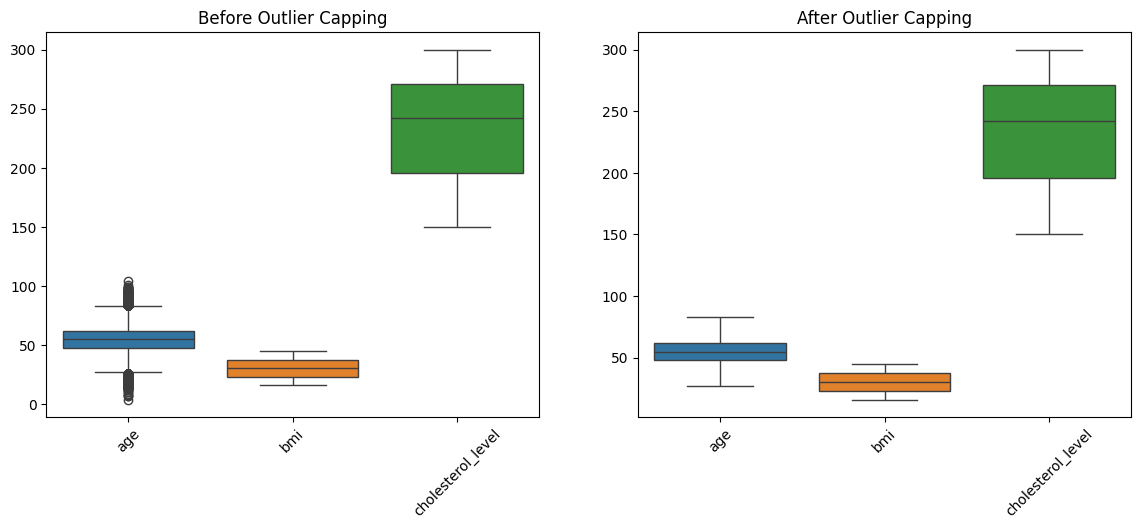

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(data=dataset[Quan_S])
plt.title("Before Outlier Capping")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data=dataset_capped[Quan_S])
plt.title("After Outlier Capping")
plt.xticks(rotation=45)

plt.show()


In [29]:
dataset_capped.to_csv("Lung_Cancer_outlier_handled.csv", index=False)


In [42]:
df = pd.read_csv('Lung_Cancer_outlier_handled.csv')

In [43]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199.0,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280.0,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268.0,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241.0,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178.0,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243.0,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240.0,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242.0,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194.0,1,1,0,0,Chemotherapy,2017-12-12,0


In [44]:
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])


df['survival_days'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days


df.drop(columns=['diagnosis_date', 'end_treatment_date'], inplace=True)


In [45]:
df

,id,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,survival_days
0,1,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199.0,0,0,1,0,Chemotherapy,0,523
1,2,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280.0,1,1,0,0,Surgery,1,424
2,3,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268.0,1,1,0,0,Combined,0,370
3,4,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241.0,1,1,0,0,Chemotherapy,0,443
4,5,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178.0,0,0,0,0,Combined,0,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,Stage IV,No,Passive Smoker,44.8,243.0,1,1,1,0,Radiation,0,237
889996,889997,62.0,Female,Cyprus,Stage II,Yes,Former Smoker,21.6,240.0,0,0,0,0,Surgery,0,631
889997,889998,48.0,Female,Estonia,Stage III,Yes,Never Smoked,38.6,242.0,1,0,0,0,Combined,1,302
889998,889999,67.0,Female,Slovakia,Stage IV,Yes,Former Smoker,18.6,194.0,1,1,0,0,Chemotherapy,0,721


In [49]:
#it replaces 'yes' with 1 and 'no' with 0.
df['family_history'] = df['family_history'].replace(['yes','no'], [1,0])

In [50]:
df

,id,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,survival_days
0,1,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199.0,0,0,1,0,Chemotherapy,0,523
1,2,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280.0,1,1,0,0,Surgery,1,424
2,3,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268.0,1,1,0,0,Combined,0,370
3,4,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241.0,1,1,0,0,Chemotherapy,0,443
4,5,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178.0,0,0,0,0,Combined,0,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,Stage IV,No,Passive Smoker,44.8,243.0,1,1,1,0,Radiation,0,237
889996,889997,62.0,Female,Cyprus,Stage II,Yes,Former Smoker,21.6,240.0,0,0,0,0,Surgery,0,631
889997,889998,48.0,Female,Estonia,Stage III,Yes,Never Smoked,38.6,242.0,1,0,0,0,Combined,1,302
889998,889999,67.0,Female,Slovakia,Stage IV,Yes,Former Smoker,18.6,194.0,1,1,0,0,Chemotherapy,0,721
